# Datasets
We are going to work on two datasets.

1. Iris dataset.
2. KNMI dataset (Weather data from Netherlands).

[Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a dataset that describes flowers and their attributes, and it is used a lot in the data science and machine learning.
We can get it from one of these two sources:
1. from scikit-learn.
2. download it from [iris website](https://archive.ics.uci.edu/ml/datasets/iris)

[KNMI dataset](https://www.knmi.nl/climatology/daily_data/download.html). a daily measure of weather info from plants across Netherlands.

## Load iris from csv:
Although we are not going to use this data from the website, but from scikit-learn, but I am listing it here just in case.

In [1]:
import pandas as pd
iris_csv = pd.read_csv('data/iris.data.csv', header=None, 
    names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species'])

In [2]:
iris_csv.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## from scikit-learn:
scikit-learn comes with a few standard datasets, and iris is one of them. To get it from scikit-learn:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
print ('type of iris: ', type(iris))
print ('dict keys: ' , iris.keys())
print ('type of iris data: ', type(iris.data))
print ('iris column names: ' , iris.feature_names)
print ('type of data: ', type(iris.data))

type of iris:  <class 'sklearn.utils.Bunch'>
dict keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
type of iris data:  <class 'numpy.ndarray'>
iris column names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
type of data:  <class 'numpy.ndarray'>


In [4]:
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Convert SK-Learn format to easier Panda format
As you saw above `scikit-learn` split and re-format the data for machine learning purpose.
We are interested to see the data in simpler format, so we will convert it to simpler DataFrame

In [5]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Descriptive Statistics with Numpy
`numpy` provides the basic of descriptive statistics:

#### Basic Descriptive Statistics:

In [6]:
import numpy as np
sepal_lengths = iris.data[:,0]

print ('The max of sepal length: ', sepal_lengths.max(), ' -- ', np.max(sepal_lengths))
print ('The min of sepal length: ', sepal_lengths.min(),  ' -- ', np.min(sepal_lengths))
print ('The mean of sepal length: ', sepal_lengths.mean(), ' -- ',  np.mean(sepal_lengths))
print ('The STD of sepal length: ', sepal_lengths.std(),  ' -- ', np.std(sepal_lengths))


The max of sepal length:  7.9  --  7.9
The min of sepal length:  4.3  --  4.3
The mean of sepal length:  5.843333333333334  --  5.843333333333334
The STD of sepal length:  0.8253012917851409  --  0.8253012917851409


#### Median and Percentile:

In [7]:
from scipy.stats import scoreatpercentile
%matplotlib notebook

print ('The median of sepal length: ', np.median(sepal_lengths))
print ('Percentile or quartile 50%: ', scoreatpercentile(sepal_lengths, 50))
print ('Percentile or quartile 75%: ', scoreatpercentile(sepal_lengths, 75))


The median of sepal length:  5.8
Percentile or quartile 50%:  5.8
Percentile or quartile 75%:  6.4


## EDA: Beyond Descriptive Statistics
Descriptive statistics are the basic of more deeper and comprehensive analysis. It is the basic tool for the `EDA` **Exploratory Data Analysis**. EDA is required to understand a dataset better, check its features and get a perliminary idea about the data.  

Let us have a general sense of the data boundaries:


In [8]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<IPython.core.display.Javascript object>


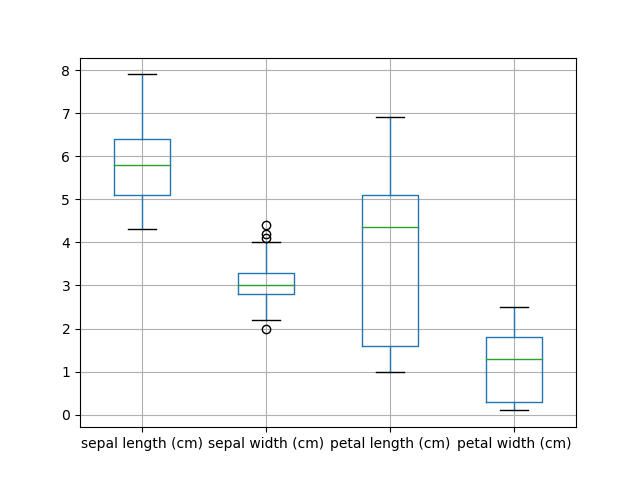

In [9]:
iris_df.boxplot(return_type='axes')

In [10]:
iris_df.quantile([0.1, 0.9])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


#### For Categorial Features

In [11]:
np.unique(iris.target)

array([0, 1, 2])